## Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change your present working directory

In [0]:
import os
os.chdir('/content/drive/My Drive/')

### Load your data file

In [4]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/AIML/Project_TimeSeriesTempPrediction/daily-minimum-temperatures-in-me.csv', index_col='Date')
df.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [5]:
df.dtypes

Temperature    float64
dtype: object

In [6]:
df.shape

(3650, 1)

#### Plot data

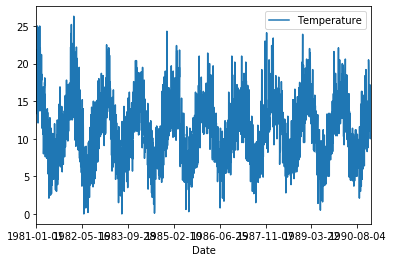

In [7]:
df.plot()

#### Descibe your dataframe

In [9]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [11]:
df.isnull().sum()

Temperature    0
dtype: int64

#### Drop null values

In [0]:
df.dropna(inplace=True)

#### Get the representation of the distribution of data in the form of histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4bd726af60>]],
      dtype=object)

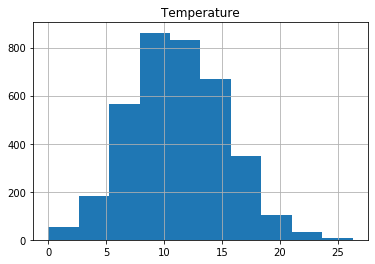

In [13]:
df.hist(bins=10)

#### Check the maximum and minimum values

In [14]:
import numpy as np
print('Min', np.min(df))
print('Max', np.max(df))

Min Temperature    0.0
dtype: float64
Max Temperature    26.3
dtype: float64


### Normalize the data

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)

#### Check the maximum and minimum values of scaled data

In [16]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


#### Look into some of the scaled values

In [20]:
scaled

array([[0.78707224],
       [0.68060837],
       [0.7148289 ],
       ...,
       [0.51330798],
       [0.59695817],
       [0.49429658]])

### Split data into Training and Testing

In [26]:
df.shape

(3650, 1)

In [0]:
train = df.iloc[:3000,:]
test = df.iloc[3000: ,:]

#### Print train and test size

In [28]:
print(train.shape)
print(test.shape)

(3000, 1)
(650, 1)


In [31]:
train.head()

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [32]:
test.head()

,Temperature
Date,
1989-03-22,16.9
1989-03-23,16.5
1989-03-24,13.6
1989-03-25,13.2
1989-03-26,9.4


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [0]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back), 0]
        dataset.iloc[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [0]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [45]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2998, 1, 1)
(648, 1, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [46]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
batch_size = 1
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Using TensorFlow backend.


### Summarize your model

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 4)                    96        
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [48]:
model.fit(X_train, y_train, epochs=100, batch_size=batch_size, verbose=2, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





 - 6s - loss: 39.3352
Epoch 2/100
 - 5s - loss: 11.5525
Epoch 3/100
 - 5s - loss: 9.3002
Epoch 4/100
 - 5s - loss: 7.6780
Epoch 5/100
 - 5s - loss: 7.2992
Epoch 6/100
 - 5s - loss: 7.0461
Epoch 7/100
 - 5s - loss: 6.9768
Epoch 8/100
 - 5s - loss: 6.9931
Epoch 9/100
 - 5s - loss: 6.9682
Epoch 10/100
 - 5s - loss: 6.9620
Epoch 11/100
 - 5s - loss: 6.9776
Epoch 12/100
 - 5s - loss: 6.8895
Epoch 13/100
 - 5s - loss: 6.9302
Epoch 14/100
 - 5s - loss: 6.9708
Epoch 15/100
 - 5s - loss: 7.0376
Epoch 16/100
 - 5s - loss: 7.0867
Epoch 17/100
 - 5s - loss: 7.1553
Epoch 18/100
 - 5s - loss: 7.1187
Epoch 19/100
 - 5s - loss: 7.3296
Epoch 20/100
 - 5s - loss: 7.5064
Epoch 21/100
 - 5s - loss: 7.6011
Epoch 22/100
 - 5s - loss: 7.8174
Epoch 23/100
 - 5s - loss: 7.7591
Epoch 24/100
 - 5s - loss: 7.6039
Epoch 25/100
 - 5s - loss: 7.3844
Epoch 26/100
 - 5s - loss: 7.3822
Epoch 27/100
 - 5s - 

## Make Predictions and Evaluate your model

In [49]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)

model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 68.92 RMSE
Test Score: 64.11 RMSE


## Plot the results

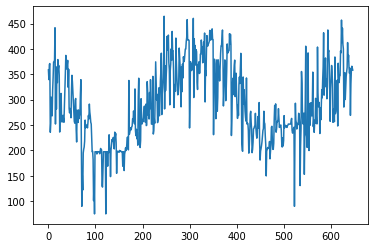

In [57]:
import matplotlib.pyplot as plt
plt.plot(testPredict)
plt.show()